In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris

In [12]:
iris = load_iris()

In [13]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [14]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
df['Target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
df['Species'] = [iris.target_names[x] for x in df['Target']]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target,Species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [17]:
df1 = df[['petal length (cm)','petal width (cm)']].copy()
df1.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [18]:
scaler = MinMaxScaler()
scaler.fit(df1[['petal length (cm)']])
df1['petal length (cm)'] = scaler.transform(df1[['petal length (cm)']])

scaler.fit(df1[['petal width (cm)']])
df1['petal width (cm)'] = scaler.transform(df1[['petal width (cm)']])

df1


,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667
...,...,...
145,0.711864,0.916667
146,0.677966,0.750000
147,0.711864,0.791667
148,0.745763,0.916667


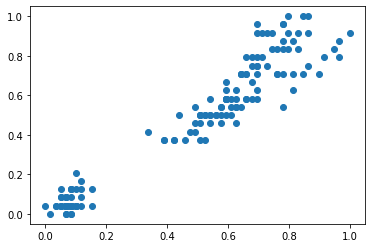

In [19]:
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'])

In [24]:
k_range = range(1,10)
sse = []
for k in k_range:
  km = KMeans(n_clusters=k)
  km.fit(df[['petal length (cm)', 'petal width (cm)']])
  sse.append(km.inertia_)

sse

[550.8953333333334,
 86.39021984551397,
 31.37135897435897,
 19.465989010989013,
 13.916908757908757,
 11.025145110250373,
 9.19386673204751,
 7.74966149068323,
 6.5993225566703835]

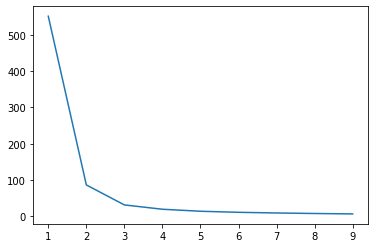

In [25]:
plt.plot(k_range,sse)

In [26]:
km = KMeans(n_clusters=3)
df1['target'] = km.fit_predict(df[['petal length (cm)', 'petal width (cm)']])
df1

,petal length (cm),petal width (cm),target
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0
...,...,...,...
145,0.711864,0.916667,1
146,0.677966,0.750000,1
147,0.711864,0.791667,1
148,0.745763,0.916667,1


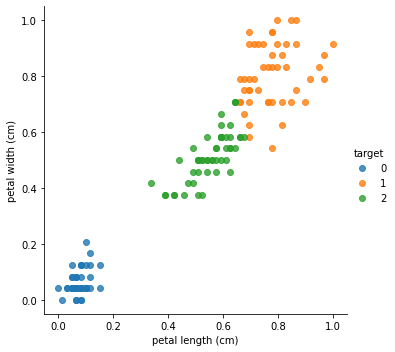

In [27]:
sns.lmplot(x = 'petal length (cm)', y = 'petal width (cm)', data = df1, hue = 'target', fit_reg=False)